In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [192]:
data1 = pd.read_csv('power_consumption_g1_feat.csv')
data1.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900


In [193]:
data2 = pd.read_csv('power_consumption_g1.csv')
data2.head(5)

,Datetime,PowerConsumption
0,2017-10-04 02:20:00,26802.27571
1,2017-05-28 13:20:00,32898.09836
2,2017-03-15 06:00:00,22304.68085
3,2017-10-31 11:40:00,32316.49891
4,2017-04-20 02:50:00,23982.43272


In [194]:
data1['Datetime'] = pd.to_datetime(data1['Datetime'])
data2['Datetime'] = pd.to_datetime(data2['Datetime'])

In [195]:
data1.set_index(keys=["Datetime"], inplace=True)
data2.set_index(keys=["Datetime"], inplace=True)

In [196]:
data1.sort_index(inplace=True)
data2.sort_index(inplace=True)

In [197]:
data = pd.merge(left=data1, right=data2, right_index=True, left_index=True)
data.head(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620


In [198]:
#vizuelizacija 

In [199]:
data.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
PowerConsumption         0
dtype: int64

In [200]:
data.tail()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452
2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490
2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989


In [201]:
#na sredina se , se spravuvame so interpolacija
features_to_interpolate = ['Temperature','Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows','DiffuseFlows']
for feature in features_to_interpolate:
    data[feature] = data[feature].interpolate(method="linear")

In [202]:
data.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64

In [203]:
#Grupirame vo interval od 30 min

In [204]:
data = data.groupby(pd.Grouper(freq="30min")).mean()
data

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.055000,0.107667,33326.235743


<Axes: >

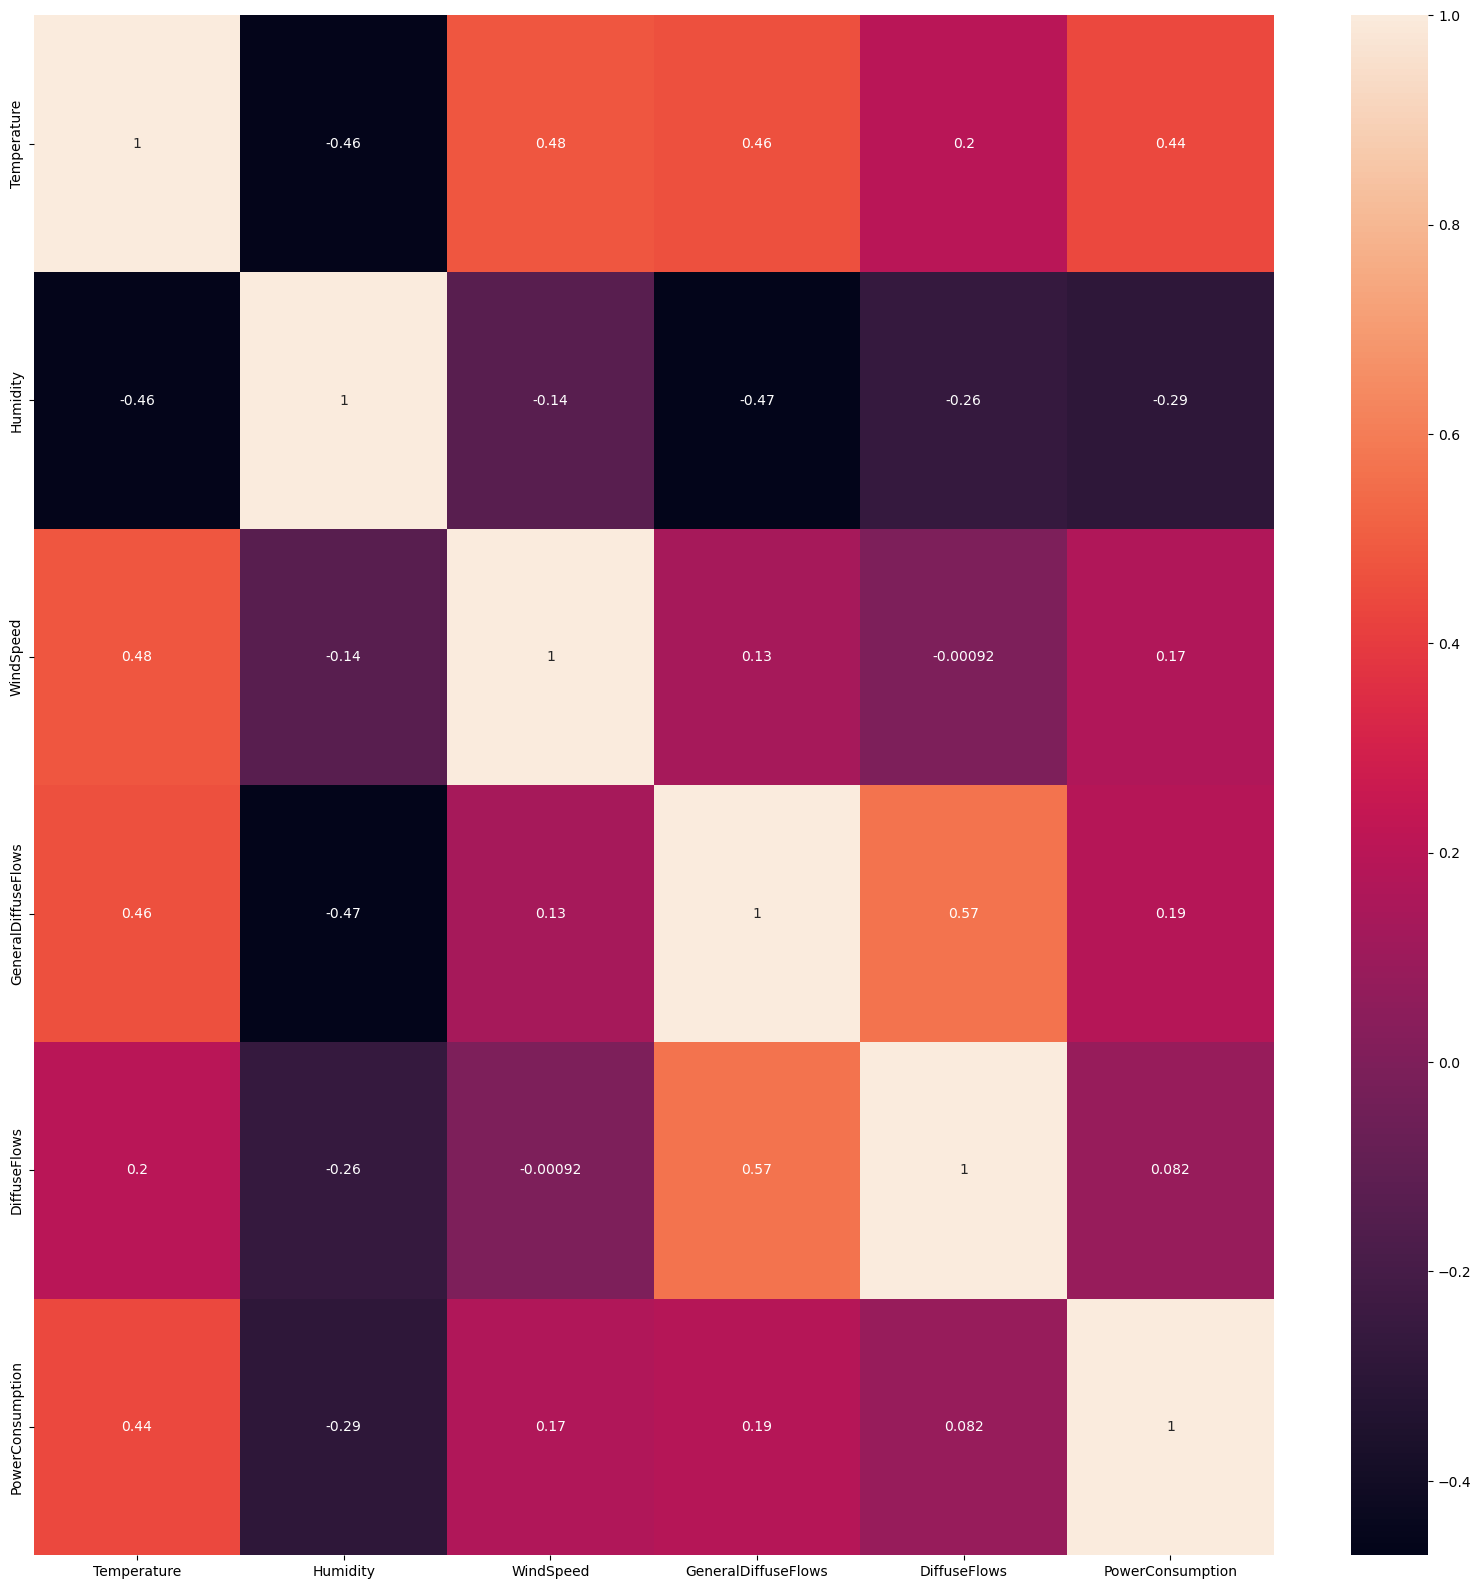

In [205]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

In [206]:
#Create lags za 5 dena

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17472 entries, 2017-01-01 00:00:00 to 2017-12-30 23:30:00
Freq: 30min
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          17472 non-null  float64
 1   Humidity             17472 non-null  float64
 2   WindSpeed            17472 non-null  float64
 3   GeneralDiffuseFlows  17472 non-null  float64
 4   DiffuseFlows         17472 non-null  float64
 5   PowerConsumption     17472 non-null  float64
dtypes: float64(6)
memory usage: 955.5 KB


In [208]:
columns_for_lags=data.columns
for feature in columns_for_lags:
    for lag in range(1,6):
        data[f'{feature}_lag_{lag}']=data[feature].shift()

In [209]:
data=data.dropna()

In [210]:
data.head(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,Temperature_lag_1,Temperature_lag_2,Temperature_lag_3,Temperature_lag_4,...,DiffuseFlows_lag_1,DiffuseFlows_lag_2,DiffuseFlows_lag_3,DiffuseFlows_lag_4,DiffuseFlows_lag_5,PowerConsumption_lag_1,PowerConsumption_lag_2,PowerConsumption_lag_3,PowerConsumption_lag_4,PowerConsumption_lag_5
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697,6.428667,6.428667,6.428667,6.428667,...,0.101333,0.101333,0.101333,0.101333,0.101333,30999.493670,30999.493670,30999.493670,30999.493670,30999.493670
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937,5.941000,5.941000,5.941000,5.941000,...,0.096333,0.096333,0.096333,0.096333,0.096333,27396.455697,27396.455697,27396.455697,27396.455697,27396.455697
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443,5.605000,5.605000,5.605000,5.605000,...,0.110000,0.110000,0.110000,0.110000,0.110000,25407.594937,25407.594937,25407.594937,25407.594937,25407.594937
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707,5.492667,5.492667,5.492667,5.492667,...,0.115000,0.115000,0.115000,0.115000,0.115000,23906.835443,23906.835443,23906.835443,23906.835443,23906.835443
2017-01-01 02:30:00,5.108000,79.100000,0.082000,0.061000,0.131000,21691.139240,5.000667,5.000667,5.000667,5.000667,...,0.127333,0.127333,0.127333,0.127333,0.127333,22474.936707,22474.936707,22474.936707,22474.936707,22474.936707


In [211]:
#BUILD LSTM MODEL

In [212]:
from sklearn.model_selection import train_test_split
data_new = data.drop('PowerConsumption',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(data_new,data['PowerConsumption'],test_size=0.2,shuffle=False)

In [213]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [214]:
Y_train = scaler.fit_transform(Y_train.to_numpy().reshape(-1, 1))

In [215]:
X_train = X_train.reshape(X_train.shape[0], lag, (X_train.shape[1] // lag))
X_test = X_test.reshape(X_test.shape[0], lag, (X_test.shape[1] // lag))

In [216]:
X_train.shape[1]

5

In [217]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [218]:
model = Sequential([
    Input((X_train.shape[1], X_train.shape[2],)),
    LSTM(32, activation="relu", return_sequences=True),
    LSTM(64, activation="relu"),
    Dense(1, activation="linear")
])

In [219]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [220]:
history = model.fit(X_train,Y_train, validation_split=0.2, epochs=16, batch_size=16, shuffle=False)

Epoch 1/16
699/699 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 2/16
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 3/16
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 4/16
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 5/16
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 6/16
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 7/16
699/699 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.00

<Axes: >

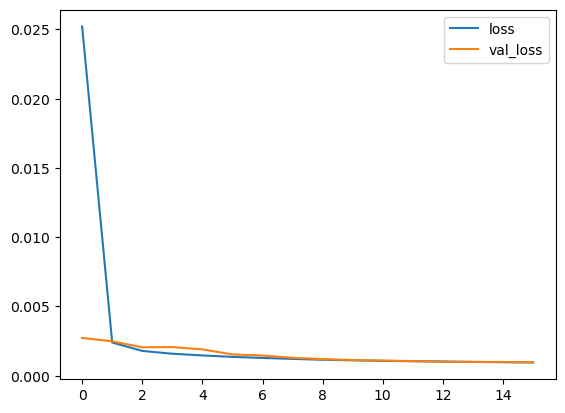

In [221]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [222]:
pred_y = model.predict(X_test)

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [223]:
pred_y = scaler.inverse_transform(pred_y)

In [224]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_y)

0.9464476834993327

In [225]:
#vizuelizacija na target vs prediction values

<Axes: xlabel='Datetime'>

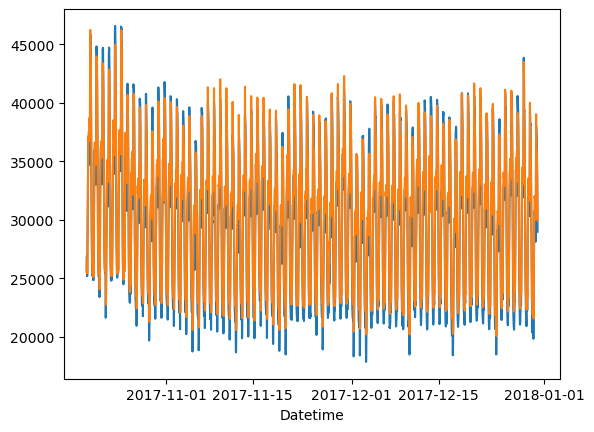

In [226]:
sns.lineplot(x=Y_test.index, y=Y_test.values)
sns.lineplot(x=Y_test.index, y=pred_y.flatten())